In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

from scipy.stats import trim_mean
from statsmodels import robust

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
state = pd.read_csv('../../data/state.csv')

In [3]:
state

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


In [4]:
state['Population'].mean()

6162876.3

In [5]:
trim_mean(state['Population'], 0.1)

4783697.125

In [6]:
state['Population'].median()

4436369.5

In [8]:
np.average(state['Murder.Rate'], weights= state['Population'])

4.445833981123393

In [7]:
import wquantiles

In [9]:
wquantiles.median(state['Murder.Rate'], weights= state['Population'])

4.4

In [11]:
state['Population'].std()

6848235.347401142

In [12]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

In [13]:
robust.scale.mad(state['Population'])

3849876.1459979336

In [14]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

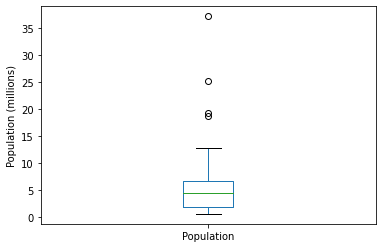

In [17]:
ax = (state['Population'] / 1000000).plot.box()
ax.set_ylabel('Population (millions)')

In [18]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Population (millions)')

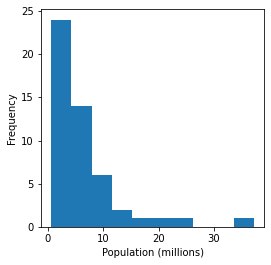

In [19]:
ax = (state['Population'] / 1000000).plot.hist(figsize= (4, 4))
ax.set_xlabel('Population (millions)')

Text(0.5, 0, 'Murder Rate (per 100,000)')

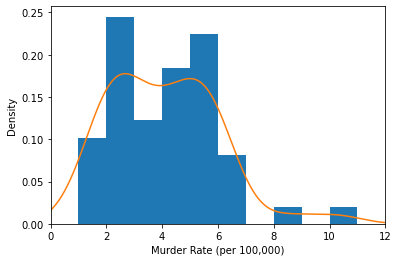

In [20]:
ax = state['Murder.Rate'].plot.hist(density= True, xlim= [0, 12], bins = range(1, 12))
state['Murder.Rate'].plot.density(ax= ax)
ax.set_xlabel('Murder Rate (per 100,000)')